In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
races = pd.read_csv('/content/races.csv')
results = pd.read_csv('/content/results.csv')

In [4]:
# Filter Monaco races
monaco_races = races[races['name'].str.contains('Monaco')]
monaco_ids = monaco_races['raceId'].unique()

In [5]:
# Filter results for Monaco races
monaco_results = results[results['raceId'].isin(monaco_ids)]

In [6]:
# Calculate position change
monaco_results['position_change'] = monaco_results['grid'] - monaco_results['positionOrder']

<ipython-input-6-77124841f573>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monaco_results['position_change'] = monaco_results['grid'] - monaco_results['positionOrder']


In [7]:
# Preview the data
monaco_results[['raceId', 'grid', 'positionOrder', 'position_change']].head()

,raceId,grid,positionOrder,position_change
108,23,3,1,2
109,23,5,2,3
110,23,1,3,-2
111,23,9,4,5
112,23,19,5,14


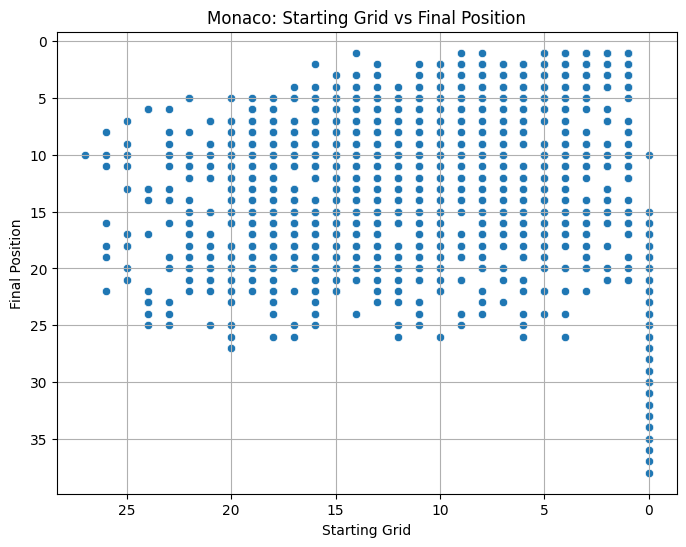

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=monaco_results, x='grid', y='positionOrder')
plt.title("Monaco: Starting Grid vs Final Position")
plt.xlabel("Starting Grid")
plt.ylabel("Final Position")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid(True)
plt.savefig("monaco_grid_vs_finish.png")  # Saves image
plt.show()

<ipython-input-9-027d9f38bf9d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette="rocket")


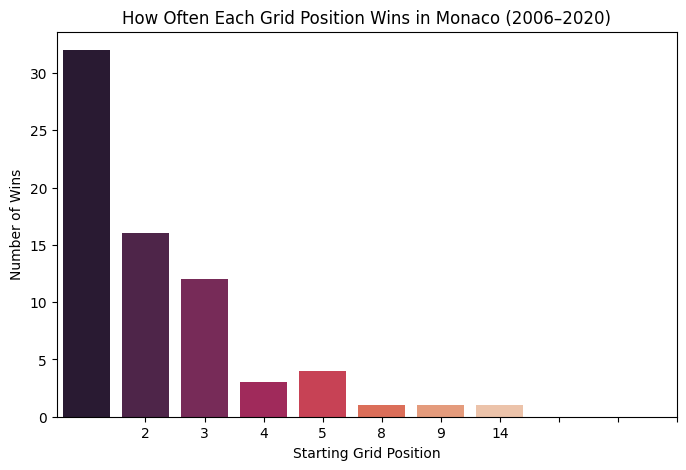

In [9]:
# Filter Monaco winners only
monaco_winners = monaco_results[monaco_results['positionOrder'] == 1]

# Count how often each grid position won
pole_win_counts = monaco_winners['grid'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette="rocket")
plt.title("How Often Each Grid Position Wins in Monaco (2006–2020)")
plt.xlabel("Starting Grid Position")
plt.ylabel("Number of Wins")
plt.xticks(range(1, 11))  # only show top 10 grid positions
plt.show()


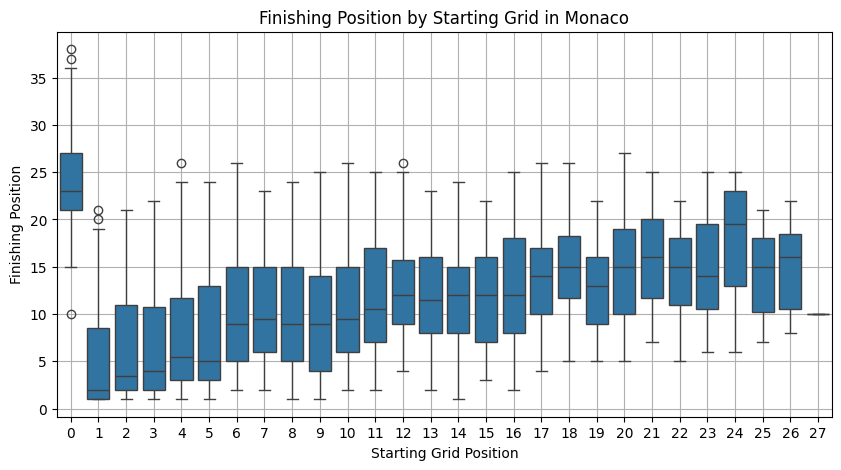

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=monaco_results, x='grid', y='positionOrder')
plt.title("Finishing Position by Starting Grid in Monaco")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.grid(True)
plt.show()


<ipython-input-13-25426d6a9b08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette="rocket")


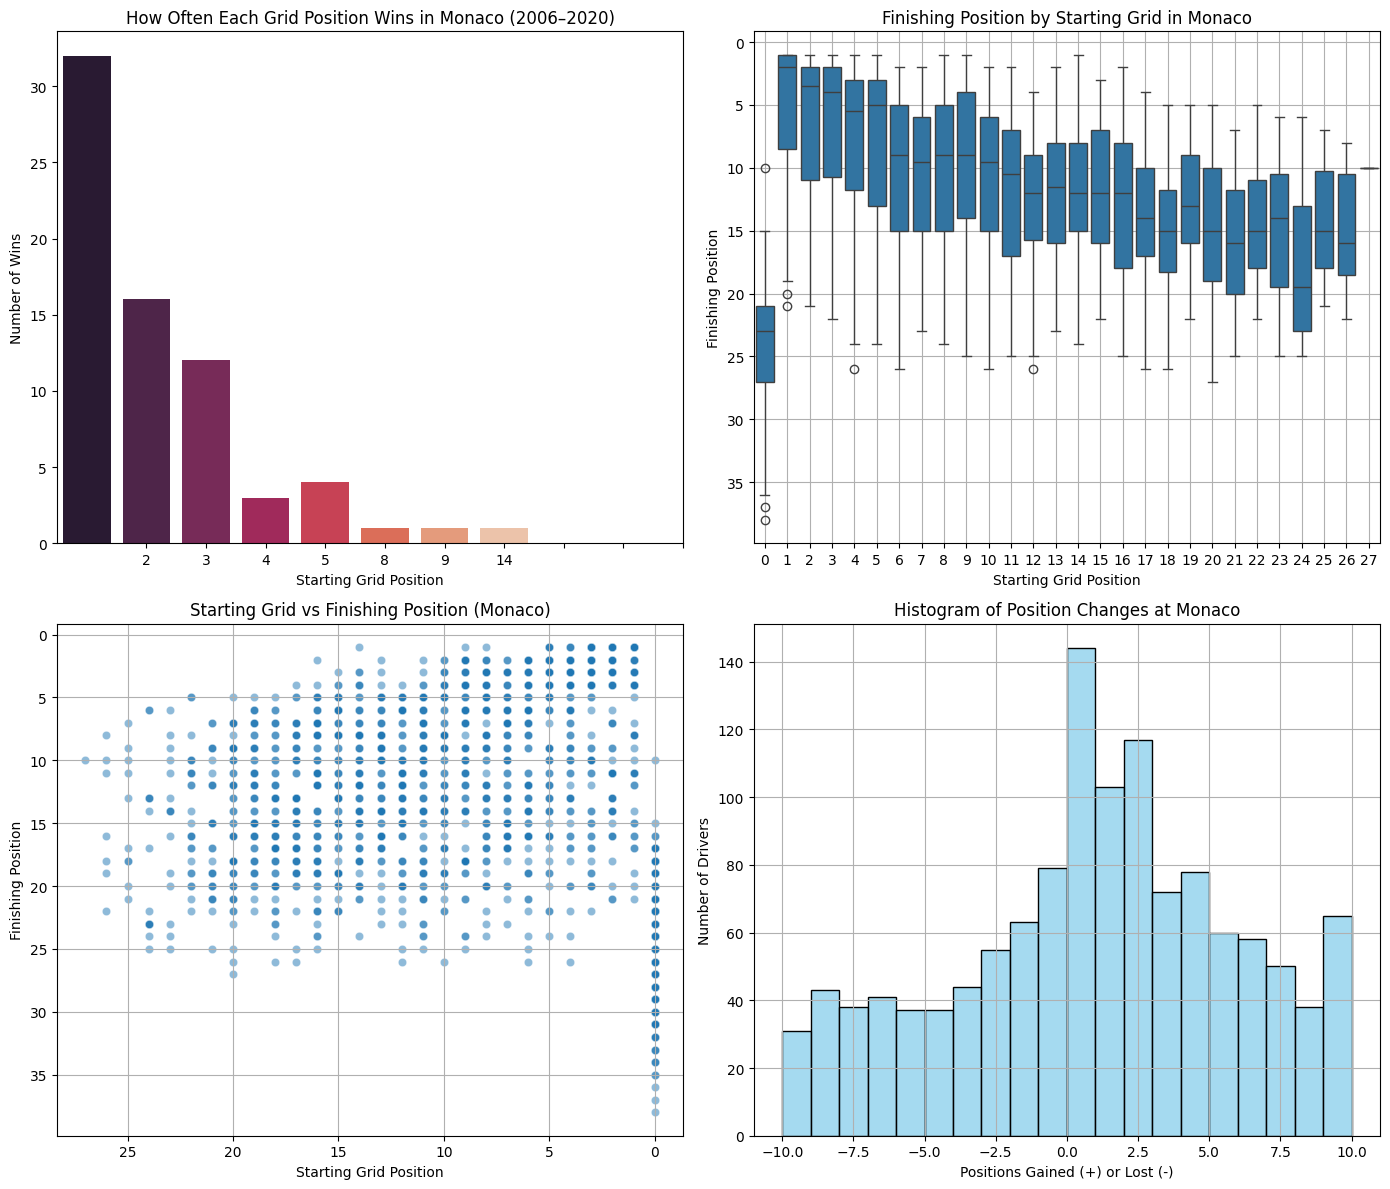

In [13]:
# Combined Figure for better comparison

plt.figure(figsize=(14, 12))  # Taller figure for 4 charts (2 rows x 2 columns)

# Top-left: Bar chart - Pole Position Wins
plt.subplot(2, 2, 1)
monaco_winners = monaco_results[monaco_results['positionOrder'] == 1]
pole_win_counts = monaco_winners['grid'].value_counts().sort_index()
sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette="rocket")
plt.title("How Often Each Grid Position Wins in Monaco (2006–2020)")
plt.xlabel("Starting Grid Position")
plt.ylabel("Number of Wins")
plt.xticks(range(1, 11))

# Top-right: Boxplot - Finishing Position by Starting Grid
plt.subplot(2, 2, 2)
sns.boxplot(data=monaco_results, x='grid', y='positionOrder')
plt.title("Finishing Position by Starting Grid in Monaco")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.grid(True)
plt.gca().invert_yaxis()

# Bottom-left: Scatter plot - Grid vs Finish
plt.subplot(2, 2, 3)
sns.scatterplot(data=monaco_results, x='grid', y='positionOrder', alpha=0.5)
plt.title("Starting Grid vs Finishing Position (Monaco)")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid(True)

# Bottom-right: Histogram - Position Changes
plt.subplot(2, 2, 4)
sns.histplot(monaco_results['position_change'], bins=range(-10, 11), kde=False, color='skyblue')
plt.title("Histogram of Position Changes at Monaco")
plt.xlabel("Positions Gained (+) or Lost (-)")
plt.ylabel("Number of Drivers")
plt.grid(True)

plt.tight_layout()
plt.savefig("monaco_4_charts_grid.png", dpi=300)
plt.show()

<ipython-input-16-d2f318d57b4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette="rocket")


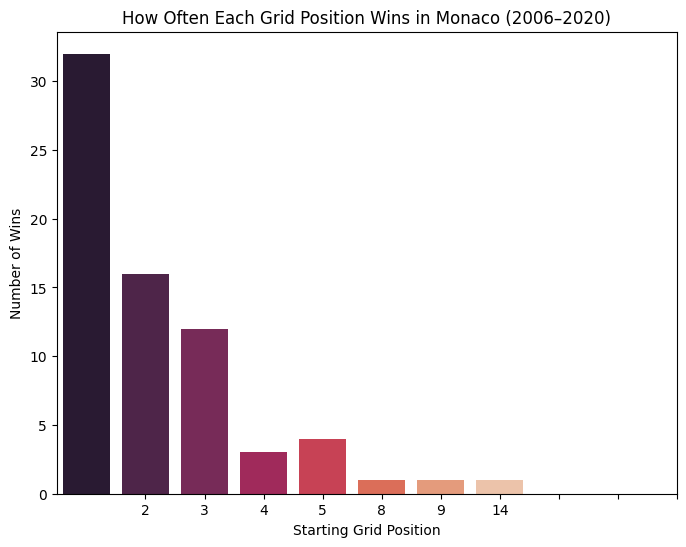

In [16]:
#Bar Chart — How Often Each Grid Position Wins in Monaco
plt.figure(figsize=(8, 6))

monaco_winners = monaco_results[monaco_results['positionOrder'] == 1]
pole_win_counts = monaco_winners['grid'].value_counts().sort_index()

sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette="rocket")
plt.title("How Often Each Grid Position Wins in Monaco (2006–2020)")
plt.xlabel("Starting Grid Position")
plt.ylabel("Number of Wins")
plt.xticks(range(1, 11))

plt.savefig("monaco_bar_chart.png", dpi=300, bbox_inches='tight')
plt.show()

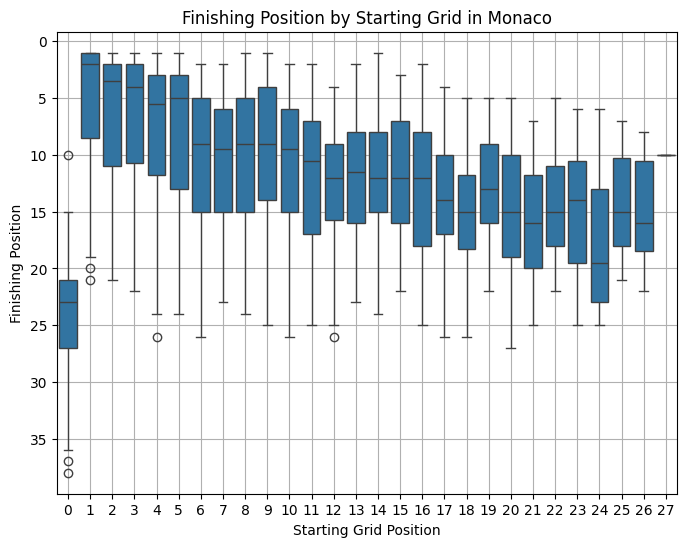

In [17]:
#Boxplot — Finishing Position by Starting Grid
plt.figure(figsize=(8, 6))

sns.boxplot(data=monaco_results, x='grid', y='positionOrder')
plt.title("Finishing Position by Starting Grid in Monaco")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.grid(True)
plt.gca().invert_yaxis()  # So that 1 is top (best finish)

plt.savefig("monaco_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

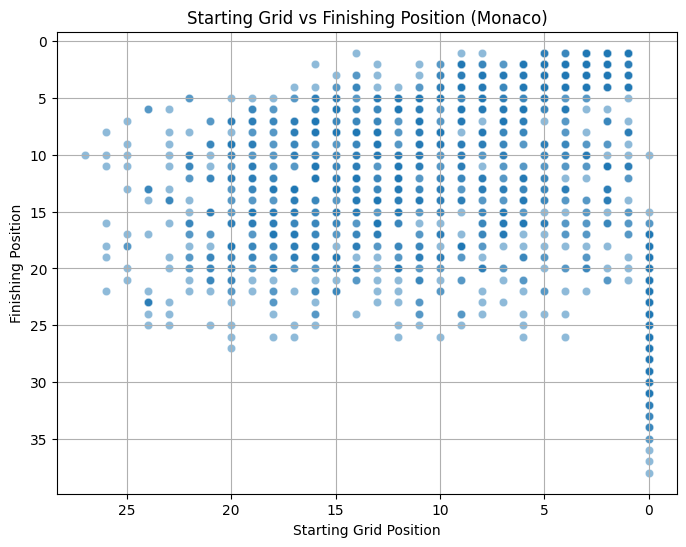

In [18]:
#Scatter Plot — Starting Grid vs Finishing Position


plt.figure(figsize=(8, 6))

sns.scatterplot(data=monaco_results, x='grid', y='positionOrder', alpha=0.5)
plt.title("Starting Grid vs Finishing Position (Monaco)")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.gca().invert_xaxis()  # So grid 1 is left
plt.gca().invert_yaxis()  # So finish 1 is top
plt.grid(True)

plt.savefig("monaco_scatterplot.png", dpi=300, bbox_inches='tight')
plt.show()


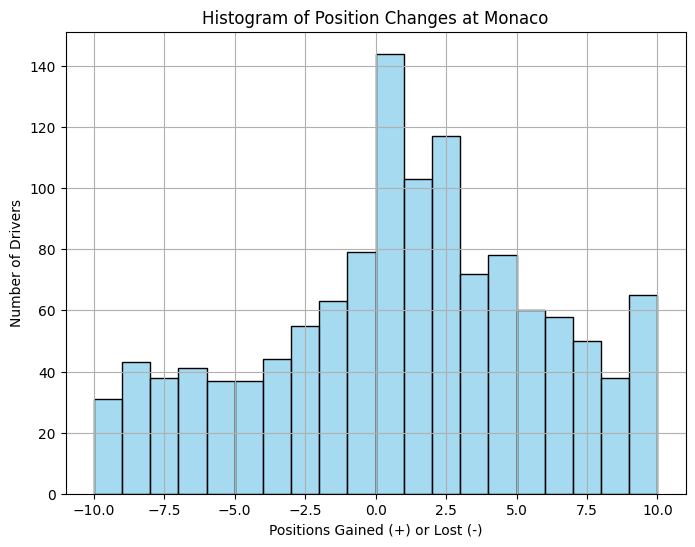

In [19]:
#Histogram — Position Changes at Monaco
plt.figure(figsize=(8, 6))

sns.histplot(monaco_results['position_change'], bins=range(-10, 11), kde=False, color='skyblue')
plt.title("Histogram of Position Changes at Monaco")
plt.xlabel("Positions Gained (+) or Lost (-)")
plt.ylabel("Number of Drivers")
plt.grid(True)

plt.savefig("monaco_histogram.png", dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-21-ffc68fa590a8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette=f1_palette, ax=axs[0, 0])
<ipython-input-21-ffc68fa590a8>:27: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette=f1_palette, ax=axs[0, 0])
<ipython-input-21-ffc68fa590a8>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=monaco_results, x='grid', y='positionOrder', ax=axs[0, 1], palette=f1_palette)
<ipython-input-21-ffc68fa590a8>:34: UserWarning: 
The palette list has fewer values (3) than needed (28

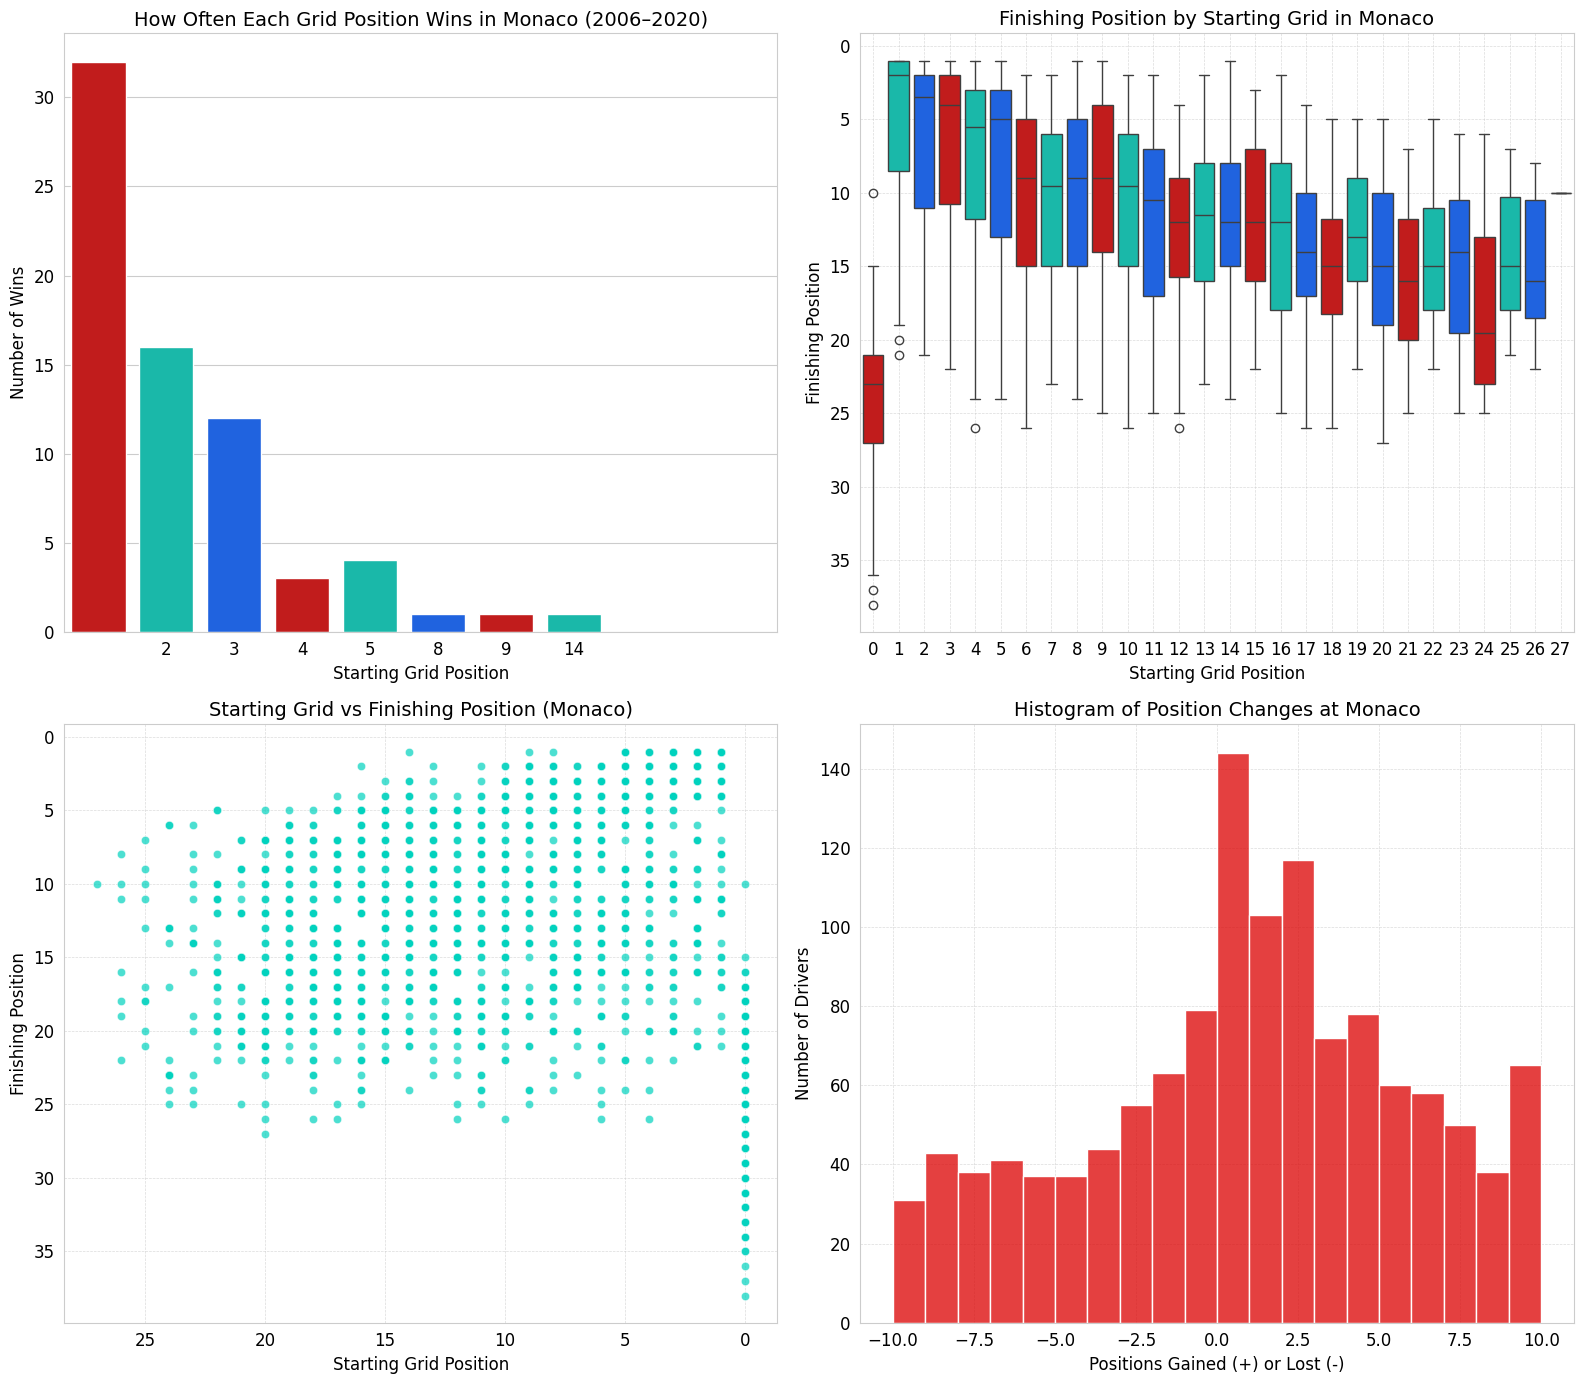

In [21]:
# Define F1 color palette
f1_palette = ["#DC0000", "#00D2BE", "#005AFF"]  # Ferrari Red, Mercedes Cyan, Williams Blue

# Use Seaborn whitegrid style for light background
sns.set_style('whitegrid')
sns.set_palette(f1_palette)

# Update font and axes colors for light background
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'grid.color': '#cccccc',
})

fig, axs = plt.subplots(2, 2, figsize=(16, 14))

# 1. Bar chart - Pole position wins
monaco_winners = monaco_results[monaco_results['positionOrder'] == 1]
pole_win_counts = monaco_winners['grid'].value_counts().sort_index()

sns.barplot(x=pole_win_counts.index, y=pole_win_counts.values, palette=f1_palette, ax=axs[0, 0])
axs[0, 0].set_title("How Often Each Grid Position Wins in Monaco (2006–2020)")
axs[0, 0].set_xlabel("Starting Grid Position")
axs[0, 0].set_ylabel("Number of Wins")
axs[0, 0].set_xticks(range(1, 11))

# 2. Boxplot - Finishing position by grid
sns.boxplot(data=monaco_results, x='grid', y='positionOrder', ax=axs[0, 1], palette=f1_palette)
axs[0, 1].set_title("Finishing Position by Starting Grid in Monaco")
axs[0, 1].set_xlabel("Starting Grid Position")
axs[0, 1].set_ylabel("Finishing Position")
axs[0, 1].invert_yaxis()
axs[0, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 3. Scatter plot - Grid vs Finish
sns.scatterplot(data=monaco_results, x='grid', y='positionOrder', alpha=0.7, color=f1_palette[1], ax=axs[1, 0])
axs[1, 0].set_title("Starting Grid vs Finishing Position (Monaco)")
axs[1, 0].set_xlabel("Starting Grid Position")
axs[1, 0].set_ylabel("Finishing Position")
axs[1, 0].invert_xaxis()
axs[1, 0].invert_yaxis()
axs[1, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 4. Histogram - Position changes
sns.histplot(monaco_results['position_change'], bins=range(-10, 11), kde=False, color=f1_palette[0], ax=axs[1, 1])
axs[1, 1].set_title("Histogram of Position Changes at Monaco")
axs[1, 1].set_xlabel("Positions Gained (+) or Lost (-)")
axs[1, 1].set_ylabel("Number of Drivers")
axs[1, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()